<hr/>

# Data Mining  

03/26/2018

**Cong Mu** - cmu2@jhu.edu  <br/>

- **Logistic Regression** 
- **Q & A**

<hr/>

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd
from scipy import linalg

<h2><font color="darkblue">Logistic Regression</font></h2>
<hr/>

### Preliminaries

- Sigmoid function
> $ \displaystyle S(x) = \frac{1}{1+e^{-x}} = \frac{e^x}{1+e^x} \qquad 0 < S(x) < 1 $

<img src="https://upload.wikimedia.org/wikipedia/commons/8/88/Logistic-curve.svg" width=300 align=center \>

<p style="text-align:right">(Picture from https://en.wikipedia.org/wiki/Sigmoid_function)</p>

- Logit
> $ \displaystyle \text{logit}(p) = \log \left( \frac{p}{1-p} \right) \qquad 0 < p < 1 $

<img src="https://upload.wikimedia.org/wikipedia/commons/c/c8/Logit.svg" width=300 align=center \>

<p style="text-align:right">(Picture from https://en.wikipedia.org/wiki/Logit)</p>

- What is the relationship between them?
> $ \displaystyle \text{logit}(p) = \log \left( \frac{p}{1-p} \right) \quad \Longrightarrow \quad e^{\text{logit}(p)} = \frac{p}{1-p} \quad \Longrightarrow \quad p = \frac{e^{\text{logit}(p)}}{1+e^{\text{logit}(p)}} $

### Recall Linear Regression

- General Form
> $ \displaystyle Y = X \beta + \epsilon $

- Fit (least square)
> $ \displaystyle \widehat{\beta} = (X^\top X)^{-1} X^\top Y $

- Predict
> $ \displaystyle \widehat{Y} = X \widehat{\beta} $

- Note that $ Y $ here is usually continuous. What if we have $ Y $ that is categorical, for example $ \displaystyle Y \in \{ 0, 1 \} $

In [3]:
# Generate data
n_samples = 100
np.random.seed(2018)

x = np.random.normal(size=n_samples)
y = (x > 0).astype(np.float)
x[x > 0] *= 4
x += .3 * np.random.normal(size=n_samples)
x = x[:, np.newaxis]

print('Features: ', x.shape)
print('Target: ', y.shape)

Features:  (100, 1)
Target:  (100,)


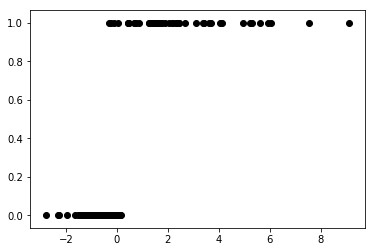

In [4]:
scatter(x, y, color='black');

- For this example, if we fit a linear regression model
> $ \displaystyle y = \beta_0 + \beta_1 x + \epsilon $
>
> $ \displaystyle \widehat{y} = \widehat{\beta}_0 + \widehat{\beta}_1 x $

In [5]:
# Fit a linear regression model
XX = np.ones((x.shape[0], 2))
XX[:,1] = x.ravel()
bHat = linalg.inv(XX.T.dot(XX)).dot(XX.T).dot(y)
b0, b1 = bHat

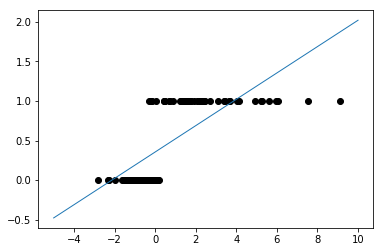

In [6]:
X_test = np.linspace(-5, 10, 300)

plot(X_test, b0 + b1 * X_test, linewidth=1);
scatter(x, y, color='black');

### Logistic Regression (Binary)

- General Form
> $ \displaystyle \text{logit} \left[ \pi(x) \right] = \log \left[ \frac{\pi(x)}{1-\pi(x)} \right] = \beta_0 + \beta_1 x \qquad $ where $ \displaystyle \qquad \pi(x) = \mathbb{P}(y=1 \ | \ X = x) $

- Fit (maximum likelihood)
> $ \displaystyle \mathcal{L}(\beta_0, \beta_1) = \prod\limits_{i: y_i = 1} \pi(x_i; \beta_0, \beta_1) \prod\limits_{j: y_{j} = 0} [1 - \pi(x_j; \beta_0, \beta_1)] $
>
> $ \displaystyle l(\beta_0, \beta_1) = \log \mathcal{L}(\beta_0, \beta_1) = \sum_{i=1}^{n} \left[y_i \log \pi(x_i; \beta_0, \beta_1) + (1-y_i) \log(1-\pi(x_i; \beta_0, \beta_1)) \right] = \sum_{i=1}^{n} \left[y_i (\beta_0 + \beta_1 x_i) - \log (1 + \exp (\beta_0 + \beta_1 x_i))  \right] $
>
> $ \displaystyle \widehat{\beta}_0, \widehat{\beta}_1 = \arg \max_{\beta_0, \beta_1} l(\beta_0, \beta_1) $

- Predict
> $ \displaystyle \widehat{\pi}(x) = \frac{\exp \left( \widehat{\beta}_0 + \widehat{\beta}_1 x \right)}{1 + \exp \left( \widehat{\beta}_0 + \widehat{\beta}_1 x \right) } $

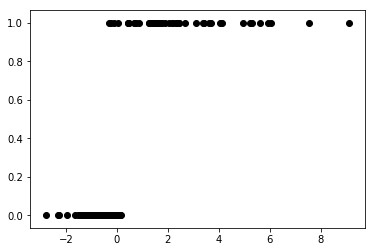

In [7]:
scatter(x, y, color='black');

- For the same example above, if we fit a logistic regression model
> $ \displaystyle \text{logit}(y) = \log \left( \frac{y}{1-y} \right) = \beta_0 + \beta_1 x $
>
> $ \displaystyle \widehat{y} = \frac{\exp \left( \widehat{\beta}_0 + \widehat{\beta}_1 x \right)}{1 + \exp \left( \widehat{\beta}_0 + \widehat{\beta}_1 x \right) } $

In [8]:
from sklearn.linear_model import LogisticRegression

In [9]:
# Fit a logistic regression model
clf = LogisticRegression(C=1e5)
clf.fit(x, y)

LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [10]:
def Sigmoid(x):
    return 1 / (1 + np.exp(-x))

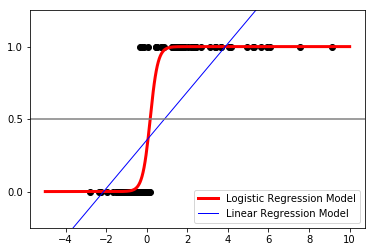

In [11]:
# Predict
prob = Sigmoid(clf.intercept_ + clf.coef_ * X_test).ravel()

# Plot the result
plot(X_test, prob, color='red', linewidth=3)
plot(X_test, b0 + b1 * X_test, color='blue', linewidth=1);
scatter(x, y, color='black');
axhline(0.5, color='0.5');
ylim(-0.25, 1.25);
yticks([0, 0.5, 1]);
legend(('Logistic Regression Model', 'Linear Regression Model'), loc='lower right');

- **Note:** For `LogisticRegression` in scikit-learn, it minimizes a cost function with some regularization
> $ \displaystyle \min_{\omega, c} \frac{1}{2} \omega^\top \omega + C \sum_{i=1}^{n} \log \left[ \exp \left( -y_i \left( X_i^\top \omega + c \right) \right) + 1 \right] \qquad L_2 \text{-regularization} $ 
>
> $ \displaystyle \min_{\omega, c} \lvert\lvert \omega \rvert\rvert_1 + C \sum_{i=1}^{n} \log \left[ \exp \left( -y_i \left( X_i^\top \omega + c \right) \right) + 1 \right] \qquad L_1 \text{-regularization} $ 

[References](http://scikit-learn.org/stable/modules/linear_model.html#logistic-regression)

### Logistic Regression (Multinomial)

- General Form (K class)
> $ \displaystyle \log \left[ \frac{\mathbb{P}(y=1 \ | \ X = x) }{\mathbb{P}(y=K \ | \ X = x) } \right] = \beta_{10} + \beta_{11} x $
>
> $ \displaystyle \log \left[ \frac{\mathbb{P}(y=2 \ | \ X = x) }{\mathbb{P}(y=K \ | \ X = x) } \right] = \beta_{20} + \beta_{21} x $
>
> ...
>
> $ \displaystyle \log \left[ \frac{\mathbb{P}(y=K-1 \ | \ X = x) }{\mathbb{P}(y=K \ | \ X = x) } \right] = \beta_{(K-1)0} + \beta_{(K-1)1} x $
>

- Fit (maximum likelihood)
> $ \displaystyle l(\beta) = \sum_{i=1}^{n} \log \pi_{g_i}(x_i; \beta) \qquad $ where $ \displaystyle \qquad \pi_{k}(x_i; \beta) = \mathbb{P}(y=k \ | \ X = x_i; \  \beta) $
>
> $ \displaystyle \widehat{\beta} = \arg \max_{\beta} l(\beta) $

- Predict
> $ \displaystyle \mathbb{P}(y=k \ | \ X = x) = \frac{\exp (\widehat{\beta}_{k0} + \widehat{\beta}_{k1} x )}{1 + \sum_{j=1}^{K-1} \exp \left( \widehat{\beta}_{j0} + \widehat{\beta}_{j1} x \right) } \qquad k = 1,2, \cdots, K-1 $
>
> $ \displaystyle \mathbb{P}(y=K \ | \ X = x) = \frac{1}{1 + \sum_{j=1}^{K-1} \exp \left( \widehat{\beta}_{j0} + \widehat{\beta}_{j1} x \right) } $

- Example

In [12]:
from sklearn import datasets

In [13]:
iris = datasets.load_iris()
X = iris.data[:,:2]             # first two features
Y = iris.target
np.unique(Y, return_counts=True)

(array([0, 1, 2]), array([50, 50, 50]))

In [14]:
# Fit the model
model1 = LogisticRegression(C=1e5)
model1.fit(X, Y)

LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [15]:
# Generate data for decision boundary
h = 0.02
x_min, x_max = X[:,0].min() - 0.5, X[:,0].max() + 0.5
y_min, y_max = X[:,1].min() - 0.5, X[:,1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict
pred = model1.predict(np.c_[xx.ravel(), yy.ravel()])
pred = pred.reshape(xx.shape)

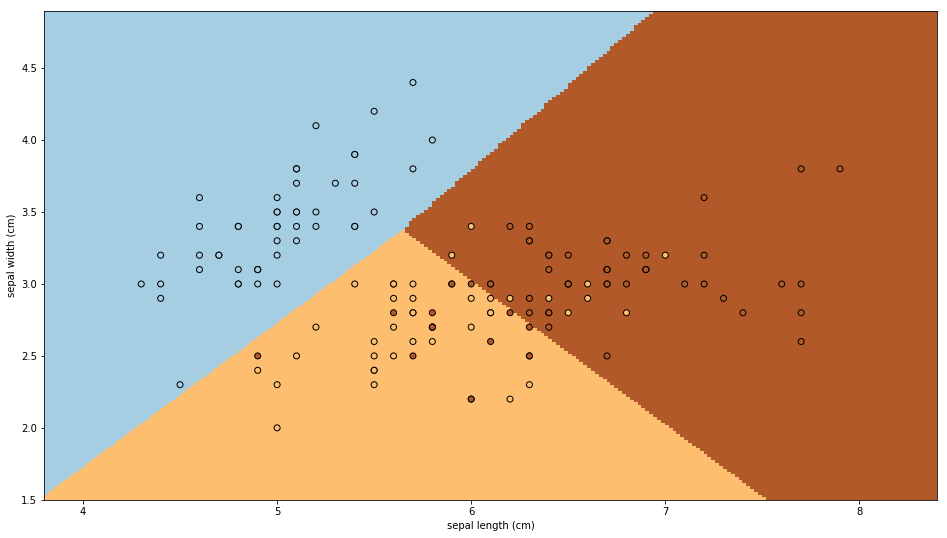

In [16]:
# Plot the result
figure(figsize=(16, 9))

pcolormesh(xx, yy, pred, cmap=plt.cm.Paired);
scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired);
xlabel(iris.feature_names[0]);
ylabel(iris.feature_names[1]);

<br/>
**References**

- Agresti, A. (1996). An introduction to categorical data analysis (Vol. 135). Wiley.
- Friedman, J., Hastie, T., & Tibshirani, R. (2001). The elements of statistical learning. Springer series in statistics.